In [1]:
import pandas as pb
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data = pb.read_csv("C:\\Users\\Windows10\\Desktop\\Machine Learning\\Covid Analysis\\covid_india_data.csv")
print(data)

       Sno      Date      Time         State/UnionTerritory  \
0      366  26/03/20   6:00 PM  Andaman and Nicobar Islands   
1      393  27/03/20  10:00 AM  Andaman and Nicobar Islands   
2      421  28/03/20   6:00 PM  Andaman and Nicobar Islands   
3      448  29/03/20   7:30 PM  Andaman and Nicobar Islands   
4      475  30/03/20   9:30 PM  Andaman and Nicobar Islands   
5      503  31/03/20   8:30 PM  Andaman and Nicobar Islands   
6      531  01/04/20   7:30 PM  Andaman and Nicobar Islands   
7      560  02/04/20   6:00 PM  Andaman and Nicobar Islands   
8      589  03/04/20   6:00 PM  Andaman and Nicobar Islands   
9      620  04/04/20   6:00 PM  Andaman and Nicobar Islands   
10     650  05/04/20   6:00 PM  Andaman and Nicobar Islands   
11     680  06/04/20   6:00 PM  Andaman and Nicobar Islands   
12     710  07/04/20   6:00 PM  Andaman and Nicobar Islands   
13     741  08/04/20   5:00 PM  Andaman and Nicobar Islands   
14     772  09/04/20   5:00 PM  Andaman and Nicobar Isl

In [2]:
plt.style.use('classic')
# plt.plot()

In [3]:
dat = data.to_numpy()
dates = []
for i in range(0,6286):
    dates.append(datetime.datetime.strptime(dat[i, 1], "%d/%m/%y"))
#     print(dates[-1].date())
dates = matplotlib.dates.date2num(dates)

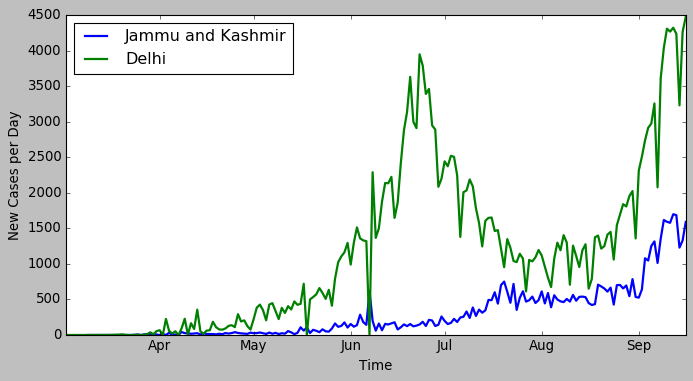

In [4]:
fig, ax = plt.subplots(figsize = (10,5))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
plt.plot_date(dates[dat[:,3] == 'Jammu and Kashmir'], dat[dat[:, 3] == 'Jammu and Kashmir'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Jammu and Kashmir")
plt.plot_date(dates[dat[:,3] == 'Delhi'], dat[dat[:, 3] == 'Delhi'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Delhi")
plt.xlabel("Time")
plt.ylabel("New Cases per Day")
plt.legend(loc = "upper left")
plt.show()

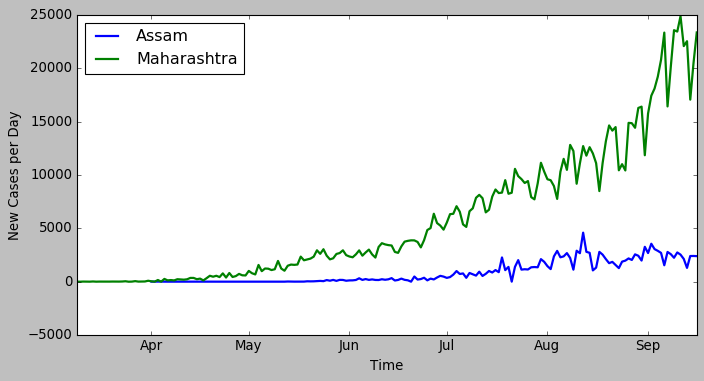

In [5]:
fig, ax = plt.subplots(figsize = (10,5))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
plt.plot_date(dates[dat[:,3] == 'Assam'], dat[dat[:, 3] == 'Assam'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Assam")
plt.plot_date(dates[dat[:,3] == 'Maharashtra'], dat[dat[:, 3] == 'Maharashtra'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Maharashtra")
plt.xlabel("Time")
plt.ylabel("New Cases per Day")
plt.legend(loc = "upper left")
plt.show()

In [6]:
dat_ = dat
dat = np.random.permutation(dat)
X = PolynomialFeatures(4).fit_transform(dat[:, 9:13])
Y = dat[:, -1]
print(X.shape)
print(Y.shape)

(6286, 70)
(6286,)


In [7]:
ratio = 6287 / 5 * 4
print(ratio)

5029.6


In [8]:
[X_train, X_test] = np.split(X, [5000])
print(X_train.shape)
print(X_test.shape)

(5000, 70)
(1286, 70)


In [9]:
[Y_train, Y_test] = np.split(Y, [5000])
print(Y_train.shape)
print(Y_test.shape)

(5000,)
(1286,)


In [10]:
print(X_train)
print(Y_train)

[[1.00000000e+00 1.37400000e+03 1.02900000e+03 ... 3.27281904e+30
  6.99529311e+30 1.49516747e+31]
 [1.00000000e+00 2.34520000e+04 1.12970000e+04 ... 4.70493953e+25
  1.20445930e+24 3.08340247e+22]
 [1.00000000e+00 2.30200000e+03 9.80000000e+01 ... 8.42798531e+26
  2.38518880e+27 6.75027944e+27]
 ...
 [1.00000000e+00 0.00000000e+00 4.60000000e+01 ... 1.15736043e+21
  1.91236937e+21 3.15991156e+21]
 [1.00000000e+00 1.55700000e+03 5.50000000e+02 ... 3.25314556e+28
  5.42575142e+28 9.04932717e+28]
 [1.00000000e+00 1.70000000e+01 5.73000000e+02 ... 2.13094167e+28
  3.97874590e+28 7.42883728e+28]]
[110 2187 620 ... 0 100 0]


In [11]:
ridgereg = RidgeCV(alphas = [1e-18, 0.0000000003, 0.000000001, 0.000000003, 0.00000001, 0.00000003, 0.0000003, 0.000001, 0.000003,0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10], normalize = True).fit(X_train, Y_train)
# ridgereg = RidgeCV(alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10], normalize = True).fit(X_train, Y_train)
ridgereg.score(X_test, Y_test)

0.9680582509048701

In [12]:
predict_X = PolynomialFeatures(4).fit_transform(np.array([98482, 319, 23625962, 37469335]).reshape(1, -1))
# print(predict_X)
ridgereg.predict(predict_X)

array([8597.51366724])

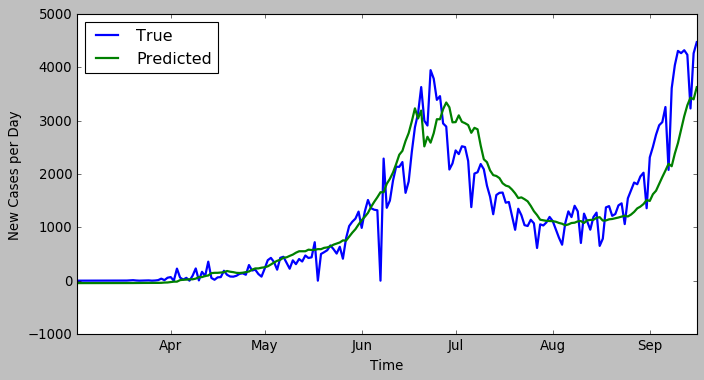

In [13]:
Y_predicted = ridgereg.predict(PolynomialFeatures(4).fit_transform(dat_[:, 9:13]))

fig, ax = plt.subplots(figsize = (10,5))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
plt.plot_date(dates[dat_[:,3] == 'Delhi'], dat_[dat_[:, 3] == 'Delhi'][:, -1], linestyle = 'solid', marker = 'None', linewidth = 2, label = "True")
plt.plot_date(dates[dat_[:,3] == 'Delhi'], Y_predicted[dat_[:, 3] == 'Delhi'], linestyle = 'solid', marker = 'None', linewidth = 2, label = "Predicted")
plt.xlabel("Time")
plt.ylabel("New Cases per Day")
plt.legend(loc = "upper left")
plt.show()

In [14]:
print(ridgereg.alpha_)

3e-10
